# Original Analysis Case Study

## Disney Plus

Brandon Sams

19Apr2020

Disney+ is quickly becoming a popular streaming service, and a good part of the reason why is the content that is available on that service. I found a list of content that is available on Disney+, and a collection of information about it.

https://www.kaggle.com/unanimad/disney-plus-shows

From the description section of kaggle:

## Content

*This dataset contains a couple of shows and series are available on Disney+ stream service. Also, this dataset contains Internet Mobie Database (IMDb) ratings that can provide many interesting insights.*

## Acknowledgements

*The dataset is collected from Flixable.
The dataset is updated monthly, every 1st day.*

# Part 1:

## Exploratory Data Analysis

In [1]:
import pandas as pd
import yellowbrick

In [2]:
fname = "disney_plus_shows.csv"
df = pd.read_csv(fname)

In [3]:
# Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.
print(f"The dimension of the data found in disney_plus_shows.csv is: {df.shape}.")

The dimension of the data found in disney_plus_shows.csv is: (954, 19).


In [4]:
# Look at the data
df.head(5)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"281,399"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"96,739"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,299"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,164"


In [5]:
df.dtypes

imdb_id         object
title           object
plot            object
type            object
rated           object
year            object
released_at     object
added_at        object
runtime         object
genre           object
director        object
writer          object
actors          object
language        object
country         object
awards          object
metascore      float64
imdb_rating    float64
imdb_votes      object
dtype: object

In [6]:
# Describe the Data
df.describe()

,metascore,imdb_rating
count,285.000000,853.000000
mean,62.150877,6.645955
std,15.798078,1.028433
min,19.000000,1.500000
25%,51.000000,6.100000
50%,62.000000,6.700000
75%,73.000000,7.400000
max,99.000000,9.700000


In [7]:
# Summarize the data
df.describe(include = ['O'])

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,imdb_votes
count,870,870,845,870,719,870,849,954,814,860,668,725,845,842,846,542,853
unique,870,849,844,3,17,178,779,47,125,360,458,695,796,71,59,254,794
top,tt0206446,Freaky Friday,The romantic tale of a sheltered uptown Cocker...,movie,G,2019,12 Nov 2019,"November 12, 2019",30 min,Documentary,Jack Hannah,George Lucas,Clarence Nash,English,USA,1 nomination.,97
freq,1,3,2,660,202,30,12,787,50,49,15,4,7,718,715,53,3


In [8]:
df['runtime'] = df['runtime'].str.replace(' min','')
df['runtime'] = df['runtime'].str.replace(' h','')
df['runtime'] = pd.to_numeric(df['runtime'])

In [9]:
df['imdb_votes'] = pd.to_numeric(df['imdb_votes'].str.replace(',',''))

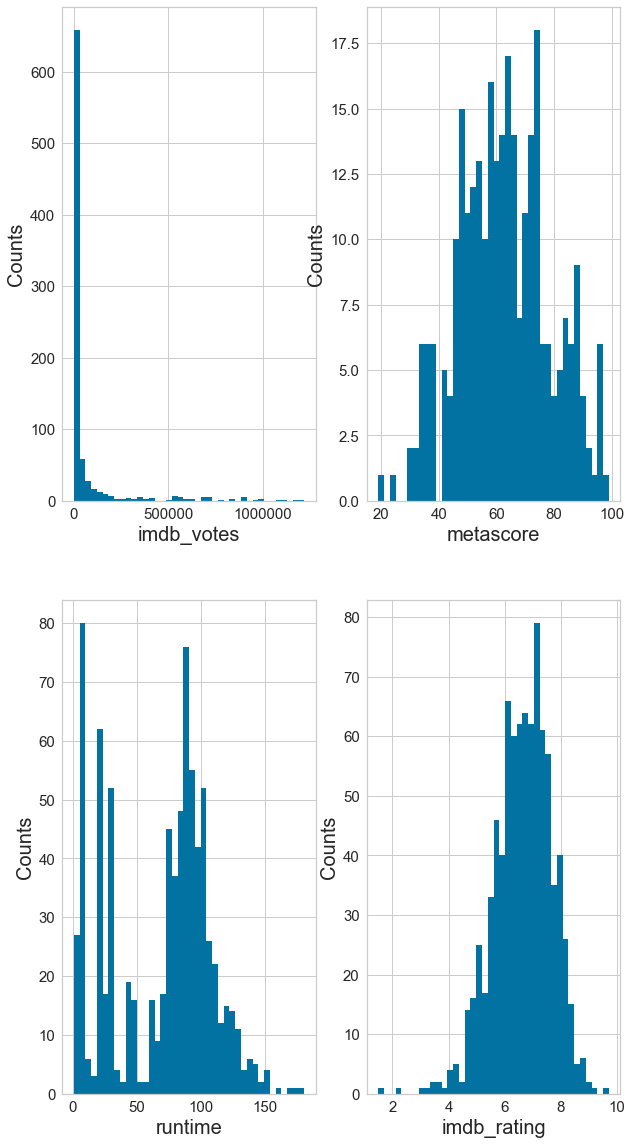

In [10]:
# Step 6: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (10, 20)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['imdb_votes', 'metascore', 'runtime', 'imdb_rating']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

7.	Make some bar charts for variables with only a few options.

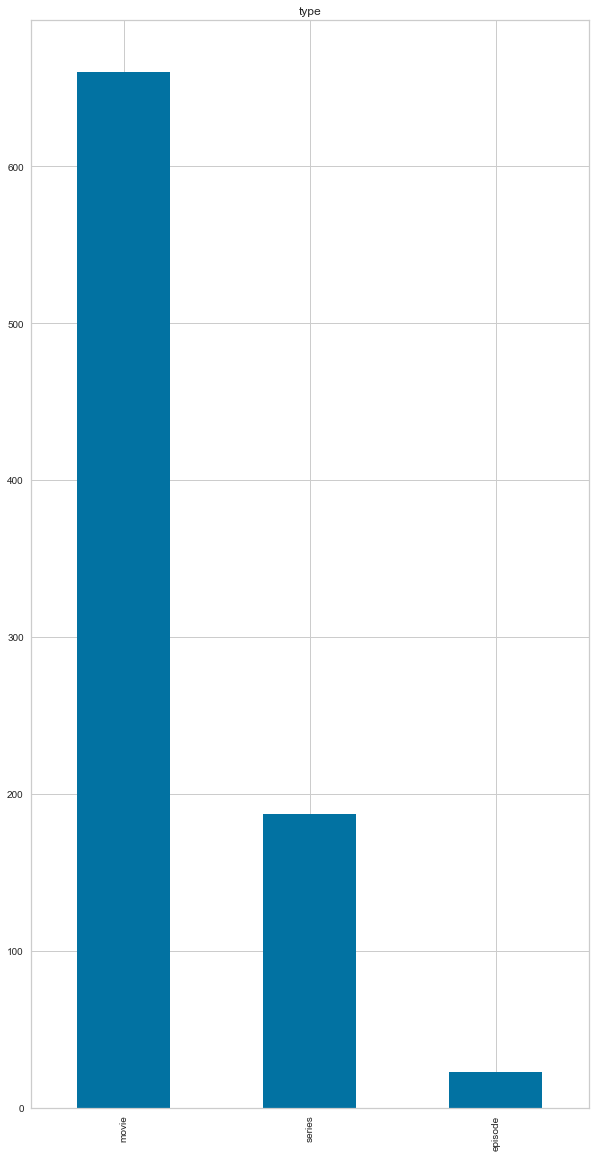

In [11]:
#7:  Barcharts: set up the figure size

#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 20)

# make the data read to feed into the visulizer
df['type'].value_counts().plot(kind='bar',title='type')
plt.show()

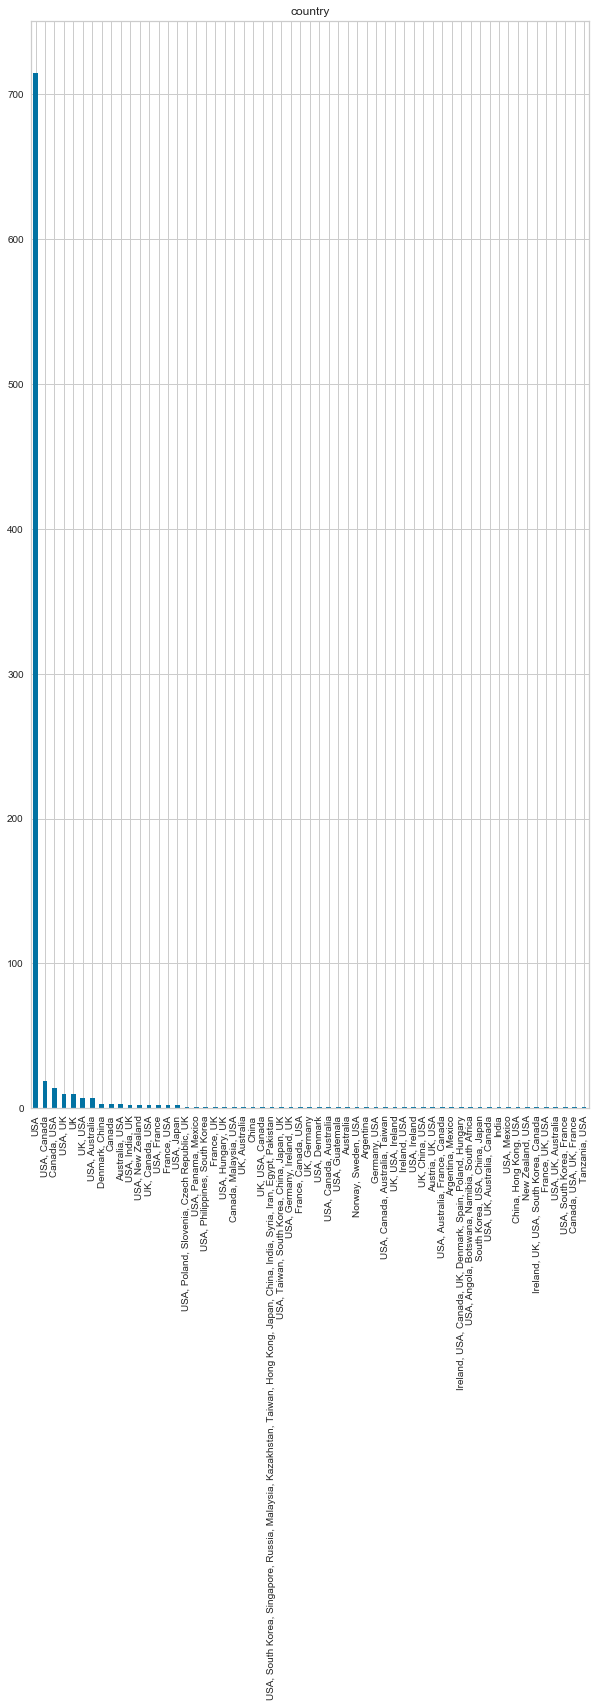

In [12]:
df['country'].value_counts().plot(kind='bar',title='country')
plt.show()

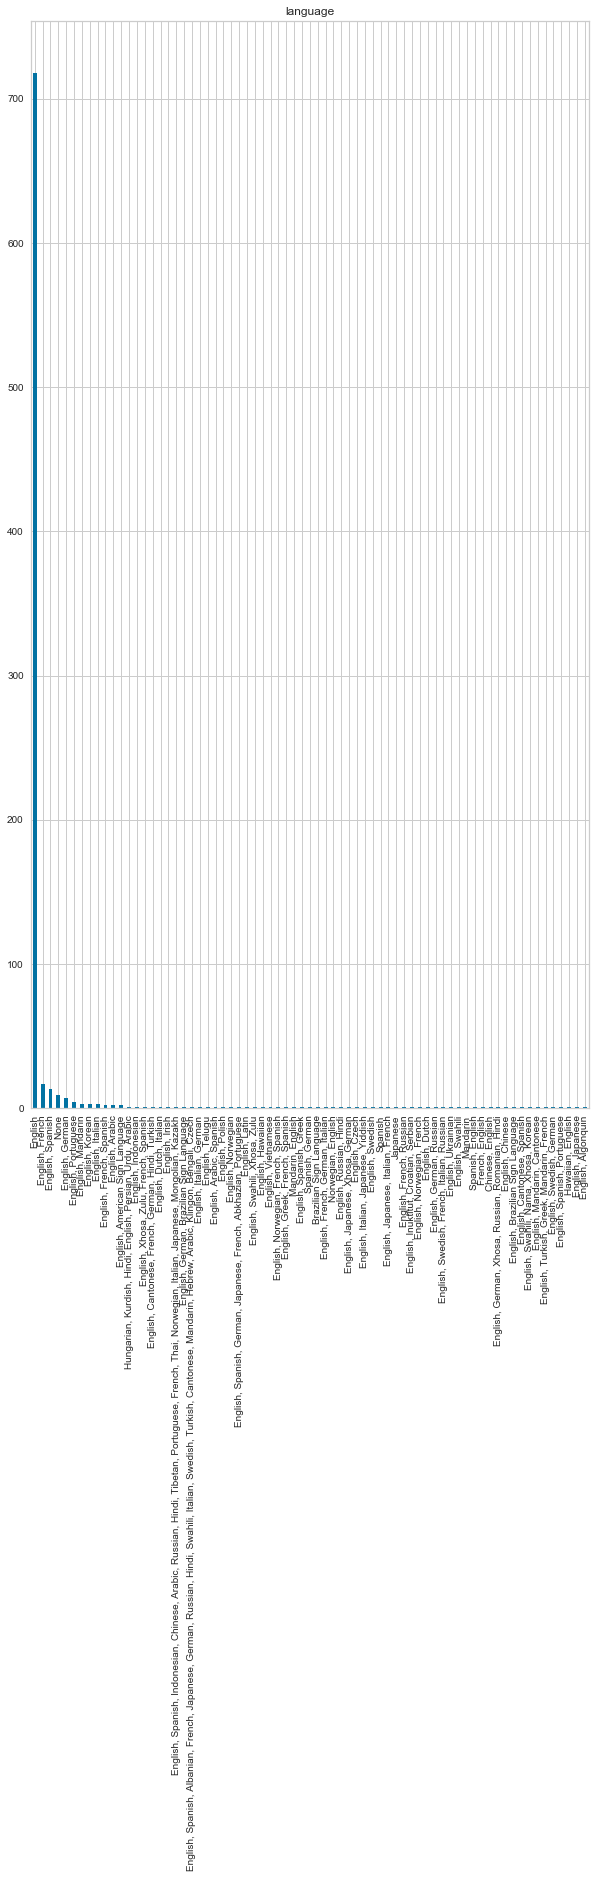

In [13]:
df['language'].value_counts().plot(kind='bar',title='language')
plt.show()

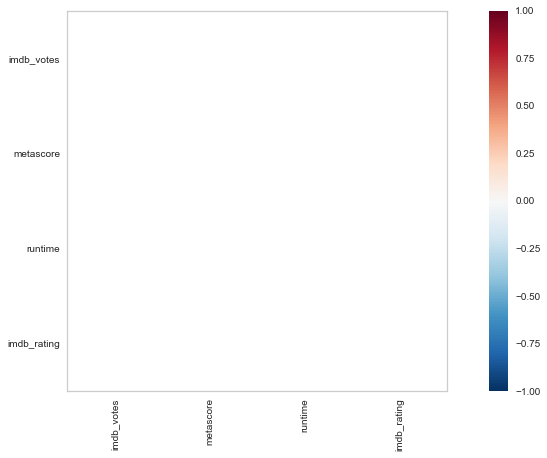

In [14]:
#Step 8: Pearson Ranking

#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.show()


# Pearson ranking does not appear to be valid for this dataset. Perhaps the data needs to be normalized or something?

# Part 2:

## Dimensionality and Feature Reduction

In [15]:
# Remove some missing data from the dataFrame

# lines without imdb_id
df = df.dropna(subset = ['imdb_id'])

In [16]:
# Label encode the genres
df['genre'] = df.genre.fillna('')
df_genre_labeled = (df.genre.str.split('\s*,\s*', expand=True)
   .stack()
   .str.get_dummies()
   .sum(level=0))
df[df_genre_labeled.columns] = df_genre_labeled

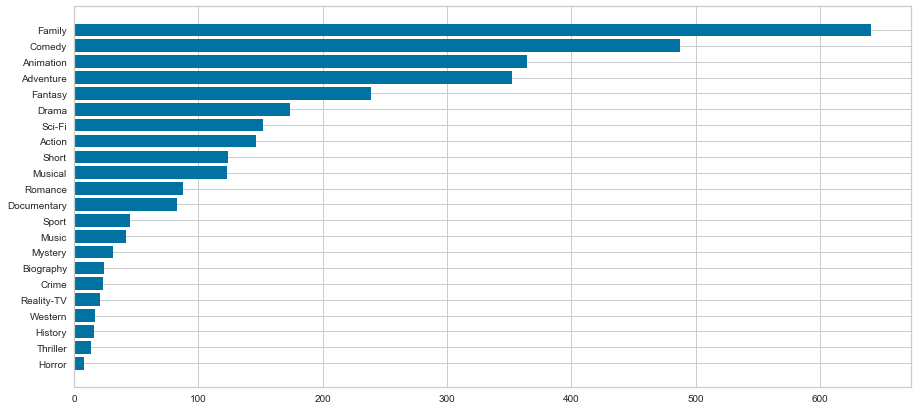

In [17]:
# show a bar chart of genres
df_bar_genre = df_genre_labeled.sum()[df_genre_labeled.sum() > 5].sort_values(ascending = True)
plt.barh(df_bar_genre.index,df_bar_genre)
plt.show()

In [18]:
# Label encode the language
df['language'] = df.language.fillna('')
df_language_labeled = (df.language.str.split('\s*,\s*', expand=True)
   .stack()
   .str.get_dummies()
   .sum(level=0))
df[df_language_labeled.columns] = df_language_labeled

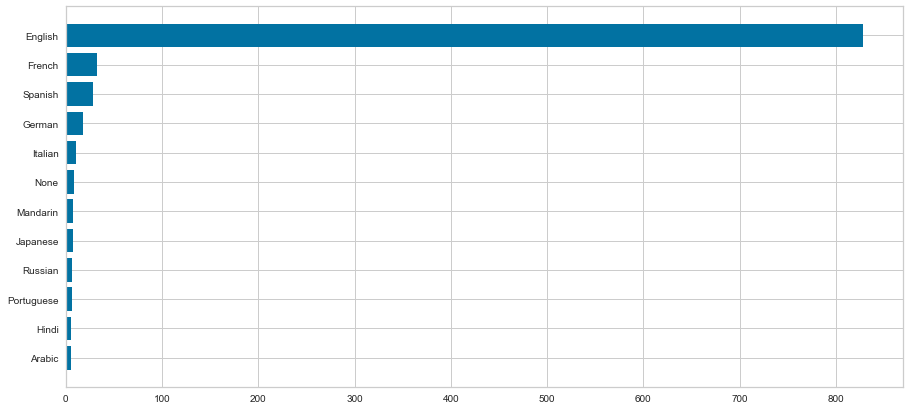

In [19]:
# show a bar chart of languages
df_bar_language = df_language_labeled.sum()[df_language_labeled.sum() > 5].sort_values(ascending = True)
plt.barh(df_bar_language.index,df_bar_language)
plt.show()

In [20]:
# Label encode the country
df['country'] = df.country.fillna('')
df_country_labeled = (df.country.str.split('\s*,\s*', expand=True)
   .stack()
   .str.get_dummies()
   .sum(level=0))
df[df_country_labeled.columns] = df_country_labeled

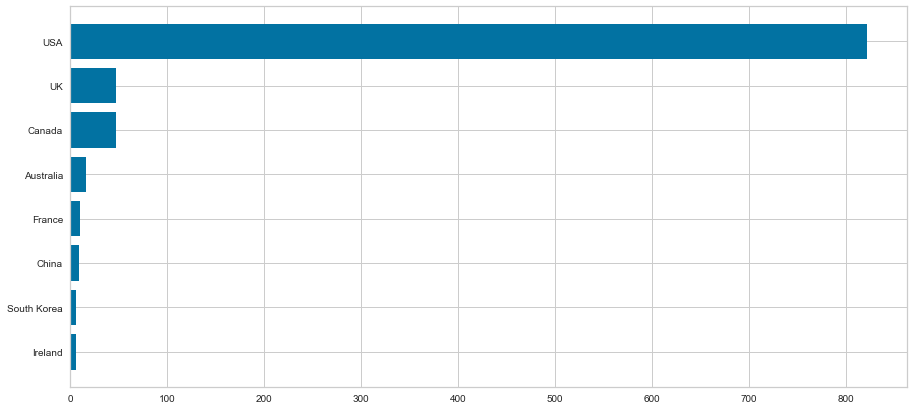

In [21]:
# show a bar chart of countries
df_bar_country = df_country_labeled.sum()[df_country_labeled.sum() > 5].sort_values(ascending = True)
plt.barh(df_bar_country.index,df_bar_country)
plt.show()

In [22]:
# Label encode the actors
df['actors'] = df.actors.fillna('')
df_actors_labeled = (df.actors.str.split('\s*,\s*', expand=True)
   .stack()
   .str.get_dummies()
   .sum(level=0))
df[df_actors_labeled.columns] = df_actors_labeled

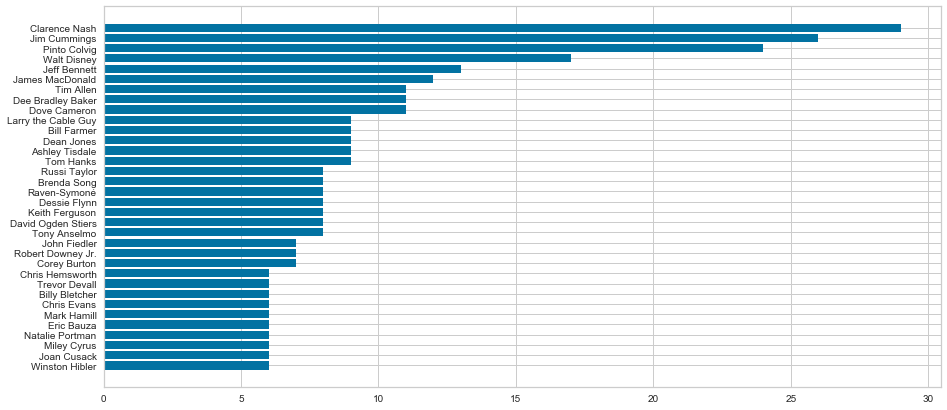

In [23]:
# Show a bar chart of common actors on Disney+
df_bar_actors = df_actors_labeled.sum()[df_actors_labeled.sum() > 5].sort_values(ascending = True)
plt.barh(df_bar_actors.index,df_bar_actors)
plt.show()